# Introducción a Regresión Polinomial

La regresión lineal univariada (una variable dependiente) y multivariada (más de una variable dependiente) que hemos discutido hasta ahora siempre supone una relación lineal entre las variables independientes y dependientes. En el mundo real, es muy común tener datos donde hay una relación no lineal entre las variables independientes y dependientes. En estos casos, podemos usar la regresión polinómica en la que suponemos que la relación entre la variable independiente x y la variable o variables dependientes y se modela como un polinomio de enésimo grado. Por ejemplo, de la lectura hemos aprendido que la relación entre el número de millas caminadas por día y la edad se puede modelar mediante una ecuación cuadrática.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [13]:
kms = np.random.normal(5, 2, 50)
ages = np.random.normal(40,13,50)
ages = [a if a > 0 else -a for a in ages] #list comprehension

In [14]:
first_kms = sorted(kms[0:int(round(len(kms)/2,0))])
second_kms = sorted(kms[int(round(len(kms)/2,0)):len(kms)], reverse=True)

ages = sorted(ages)
kms = first_kms + second_kms
print(len(kms))
print(len(ages))

50
50


In [15]:
df = pd.DataFrame({"age": ages, "kilometers": kms})

In [16]:
df

,age,kilometers
0,6.325717,0.514630
1,8.794103,0.957490
2,21.204469,1.906189
3,21.774347,2.618049
4,25.015432,3.558823
5,25.145793,3.688061
6,26.103146,3.726953
7,26.637943,4.331845
8,27.334928,4.374696
9,27.958694,4.594707


(array([ 2.,  0.,  2.,  7.,  6., 10., 11.,  7.,  3.,  2.]),
 array([ 6.32571659, 12.33292964, 18.34014268, 24.34735573, 30.35456878,
        36.36178183, 42.36899488, 48.37620793, 54.38342097, 60.39063402,
        66.39784707]),
 <a list of 10 Patch objects>)

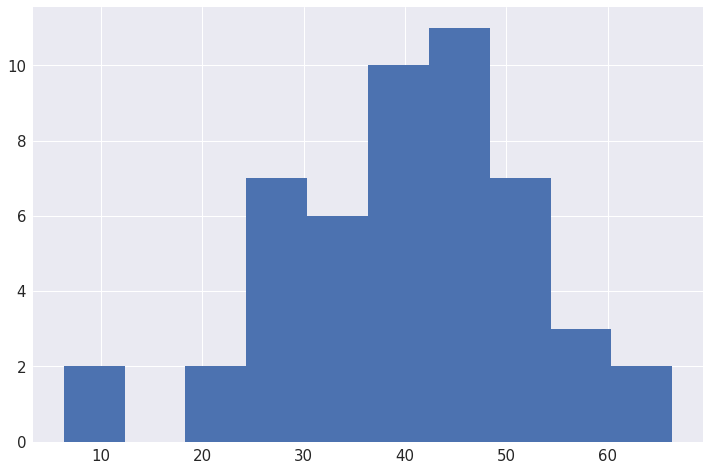

In [17]:
plt.hist(df['age'])

(array([ 4.,  1.,  2.,  6., 11.,  9.,  9.,  7.,  0.,  1.]),
 array([0.51463009, 1.44135919, 2.36808828, 3.29481737, 4.22154647,
        5.14827556, 6.07500466, 7.00173375, 7.92846284, 8.85519194,
        9.78192103]),
 <a list of 10 Patch objects>)

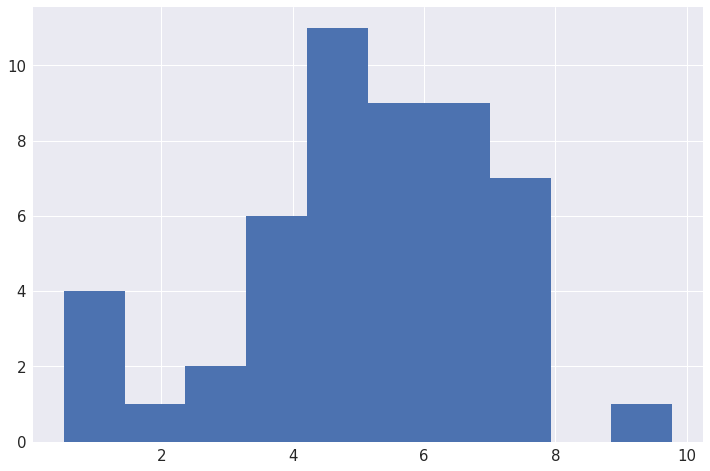

In [18]:
plt.hist(df['kilometers'])

Text(0.5,1,'Scatter plot of kilometers walked in a day vs age')

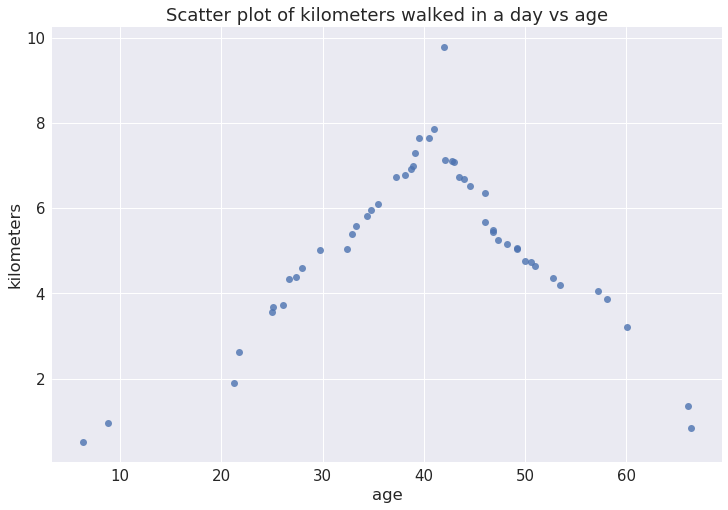

In [19]:
# Grafico kilometers vs. age
ax = sns.regplot(x='age', y='kilometers', data=df, fit_reg=False)
ax.set_title('Scatter plot of kilometers walked in a day vs age')

¿Te parece lineal la relación anterior? Si no, ¿qué tipo de relación crees que es?

</br>
</br>
</br>

Intentemos ajustar una parábola (un polinomio de 2 grados) a los datos.

In [20]:
pd.options.mode.chained_assignment = None  # default='warn'

# Definamos nuestra variable dependiente
y_column = 'kilometers'
y = df[y_column]
# Definamos nuestras variables independientes
x_columns = ['age']
X = df[x_columns]

# Dividimos la data entre desarrollo y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training = pd.concat([pd.DataFrame({'kilometers' : y_train}), X_train], axis=1)

model = sm.ols(formula = 'kilometers ~ np.power(age, 2) + age', data = training).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             kilometers   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     57.38
Date:                Sat, 03 Aug 2019   Prob (F-statistic):           4.57e-12
Time:                        02:42:08   Log-Likelihood:                -52.635
No. Observations:                  40   AIC:                             111.3
Df Residuals:                      37   BIC:                             116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.1822      0.881  

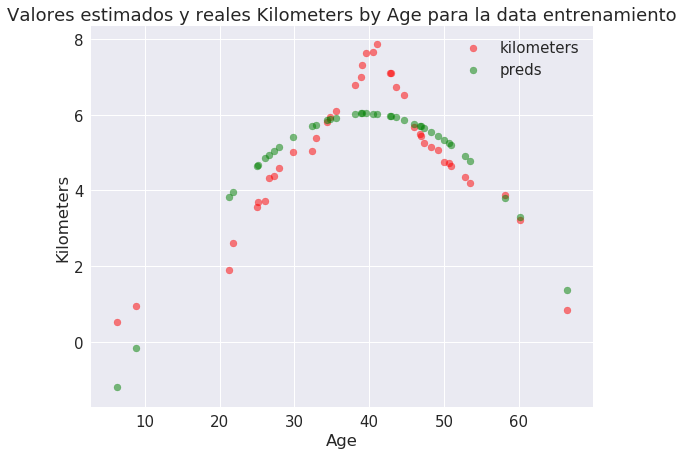

In [21]:
# Obtengamos los predictores de la data entrenamiento y grafiquemos
training['preds'] = model.predict(training['age'])

plt.figure(figsize=(9,7))
plt.scatter(training['age'], training['kilometers'], alpha=0.5, c='r')
plt.scatter(training['age'], training['preds'], alpha=0.5, c='g')
plt.title('Valores estimados y reales Kilometers by Age para la data entrenamiento')
plt.xlabel('Age')
plt.ylabel('Kilometers')
plt.legend()
plt.show();


In [22]:
p = model.params

Termine este notebook para ajustar el modelo a los datos de prueba (test data). ¿Cómo es el ajuste?